In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.initializers import he_normal
from keras.regularizers import l2
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.merge import concatenate
np.set_printoptions(suppress=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tobacco_Project/Dataset CSV/Samples_Dataset_5Classes.csv')
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '')
df['Label'] = df['Label'].str.strip()


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Tobacco_Project/Dataset CSV/BunerCSVForest (1).csv')
df1.columns = df1.columns.str.rstrip()
df1.columns = df1.columns.str.replace(' ', '')
X1 = df1[["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12", "B13", "B14", "B15", "B16", "B17", "B18", "B19", "B20"]].values

In [ ]:
Y =  np.concatenate((Y, newlabels), axis = 0)
X = preprocessing.normalize(X)

In [ ]:
X=X.reshape(X.shape[0], int(X.shape[1]/4), 4)

ValueError: ignored

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
np.unique(Y, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6.]),
 array([ 28664,  32814,  68292,   4769,  10254,   3740, 120077]))

In [ ]:
X_train=X_train.reshape(X_train.shape[0], int(X_train.shape[1]/5), 5)
X_test=X_test.reshape(X_test.shape[0], int(X_test.shape[1]/5), 5)

# **InceptionResNet**

# **Conv1D and Inception Layer**

In [ ]:
inputs = Input(shape=(X_train.shape[1],X_train.shape[2]))


incep_conv1 = Conv1D(32, kernel_size=1, padding='same', 
                     data_format = 'channels_first',strides = 1)(inputs) # (4, 32)
incep_conv3 = Conv1D(32, kernel_size=3, padding='same', 
                     data_format = 'channels_first',strides = 1)(inputs) # (4, 32)
incep_conv5 = Conv1D(32, kernel_size=5, padding='same', 
                     data_format = 'channels_first',strides = 1)(inputs) # (4, 32)
inception_layer = concatenate([incep_conv1, incep_conv3, incep_conv5], axis=-1)

# bn1 = BatchNormalization(axis=1)(inception_layer)
act1 = Activation('relu')(inception_layer)
d1 = Dropout(0.5)(act1)

incep_conv1 = Conv1D(32, kernel_size=1, padding='same', 
                     data_format = 'channels_first',strides = 1)(d1) # (4, 32)
incep_conv3 = Conv1D(32, kernel_size=3, padding='same', 
                     data_format = 'channels_first',strides = 1)(d1) # (4, 32)
incep_conv5 = Conv1D(32, kernel_size=5, padding='same',
                     data_format = 'channels_first', strides = 1)(d1) # (4, 32)
inception_layer2 = concatenate([incep_conv1, incep_conv3, incep_conv5], axis=-1)

# bn2 = BatchNormalization(axis=1)(inception_layer2)
act2 = Activation('relu')(inception_layer2)
d2 = Dropout(0.5)(act2)

incep_conv1 = Conv1D(32, kernel_size=1, padding='same', 
                     data_format = 'channels_first',strides = 1)(d2) # (4, 32)
incep_conv3 = Conv1D(32, kernel_size=3, padding='same', 
                     data_format = 'channels_first',strides = 1)(d2) # (4, 32)
incep_conv5 = Conv1D(32, kernel_size=5, padding='same', 
                     data_format = 'channels_first',strides = 1)(d2) # (4, 32)
inception_layer3 = concatenate([incep_conv1, incep_conv3, incep_conv5], axis=-1)

# bn3 = BatchNormalization(axis=1)(inception_layer3)
act3 = Activation('relu')(inception_layer3)
d3 = Dropout(0.5)(act3)

flat = Flatten()(d3)

dense = Dense(64, kernel_initializer = he_normal(), kernel_regularizer = l2(1.e-6))(flat)
# bn = BatchNormalization(axis=-1)(dense)
act = Activation('relu')(dense)
drop4 = Dropout(0.5) (act)

output = Dense(units=7, activation='softmax', kernel_initializer = he_normal(), kernel_regularizer = l2(1.e-6))(drop4)

model = Model(inputs=inputs, outputs=output)

model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'], )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 5)]       0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4, 32)        192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4, 32)        512         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 4, 32)        832         input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_train),
                                                 Y_train)
class_weights = dict(enumerate(class_weights))

print(class_weights)
history=model.fit(X_train, 
          Y_train,
          epochs=10,
          batch_size=64,
          class_weight=class_weights,
          validation_data = (X_test, Y_test),
          verbose=2,
          )

{0: 1.3390746222152983, 1: 1.1678124439565456, 2: 0.561663599866176, 3: 8.042516561248549, 4: 3.7178497897887506, 5: 10.205547112462007, 6: 0.31998046357320054}
Epoch 1/10
3358/3358 - 22s - loss: 0.5203 - accuracy: 0.8193 - val_loss: 0.2790 - val_accuracy: 0.8946
Epoch 2/10
3358/3358 - 14s - loss: 0.3060 - accuracy: 0.8803 - val_loss: 0.2330 - val_accuracy: 0.9085
Epoch 3/10
3358/3358 - 14s - loss: 0.2686 - accuracy: 0.8957 - val_loss: 0.2136 - val_accuracy: 0.9200
Epoch 4/10
3358/3358 - 14s - loss: 0.2474 - accuracy: 0.9040 - val_loss: 0.1884 - val_accuracy: 0.9312
Epoch 5/10
3358/3358 - 14s - loss: 0.2374 - accuracy: 0.9080 - val_loss: 0.1814 - val_accuracy: 0.9346
Epoch 6/10
3358/3358 - 14s - loss: 0.2314 - accuracy: 0.9112 - val_loss: 0.1803 - val_accuracy: 0.9327
Epoch 7/10
3358/3358 - 14s - loss: 0.2240 - accuracy: 0.9139 - val_loss: 0.1620 - val_accuracy: 0.9418
Epoch 8/10
3358/3358 - 14s - loss: 0.2179 - accuracy: 0.9161 - val_loss: 0.1646 - val_accuracy: 0.9391
Epoch 9/10
3358

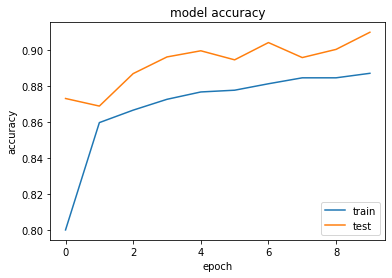

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

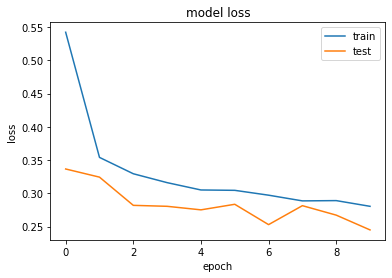

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model_json = model.to_json()
model.save_weights('./conv1D_temporal_increased.h5')

with open('./conv1D_temporal_increased.json', 'w') as f:
    f.write(model.to_json())